## Case : Build a model to predict the monthly salary of candidates

In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

### Data Description

Column | Description
:---|:---
`id` | Record index
`timestamp` | Datetime (YYYY:MM:DD HH:MM:SS) when data was collected
`country` | Current country of employment
`employment_status` | Whether a candidate is Full time, Part time, Independent or freelancer or company owner
`job_title` | Current job title of the candidate
`job_years` | Total job experience (in Years)
`is_manager` | Whether the candidate holds a managerial position or not (Yes or No)
`hours_per_week` | No. of hours per day committed to the current job
`telecommute_days_per_week` | No. of telecommuting days per week (working from home)
`education` | The highest degree in education the candidate has received
`is_education_computer_related` | Is the education related to the field of computer science (Yes or No)
`certifications` | Does the candidate have any relevant certifications (Yes or No)
`salary` | Monthly Salary (in US $$)

In [2]:
# Dataset is already loaded below
data = pd.read_csv("employee.csv")

In [3]:
# Dimensions of training data
data.shape

(4277, 13)

In [4]:
# Print first few rows of data
data.head()

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,1,12/11/2018 10:52:26,Slovenia,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,2,1/5/2017 16:57:50,United States,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,3,12/18/2017 8:13:15,Sweden,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,4,12/27/2018 4:56:52,United States,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,5,12/11/2018 14:07:58,United States,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [5]:
# drop id, timestamp and country columns
data = data.drop(columns=['id', 'timestamp','country'])

In [6]:
# Explore columns
data.columns

Index(['employment_status', 'job_title', 'job_years', 'is_manager',
       'hours_per_week', 'telecommute_days_per_week', 'education',
       'is_education_computer_related', 'certifications', 'salary'],
      dtype='object')

In [7]:
# replace NANs in hours_per_week with median value of the column
data.loc[data['hours_per_week'].isna(), 'hours_per_week'] = data['hours_per_week'].median()
data.loc[data['telecommute_days_per_week'].isna(), 'telecommute_days_per_week'] = data['telecommute_days_per_week'].median()

In [8]:
#Handling null values in categorical columns
data = data.dropna()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4261 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employment_status              4261 non-null   object 
 1   job_title                      4261 non-null   object 
 2   job_years                      4261 non-null   float64
 3   is_manager                     4261 non-null   object 
 4   hours_per_week                 4261 non-null   float64
 5   telecommute_days_per_week      4261 non-null   float64
 6   education                      4261 non-null   object 
 7   is_education_computer_related  4261 non-null   object 
 8   certifications                 4261 non-null   object 
 9   salary                         4261 non-null   float64
dtypes: float64(4), object(6)
memory usage: 366.2+ KB


### Data Visualization :

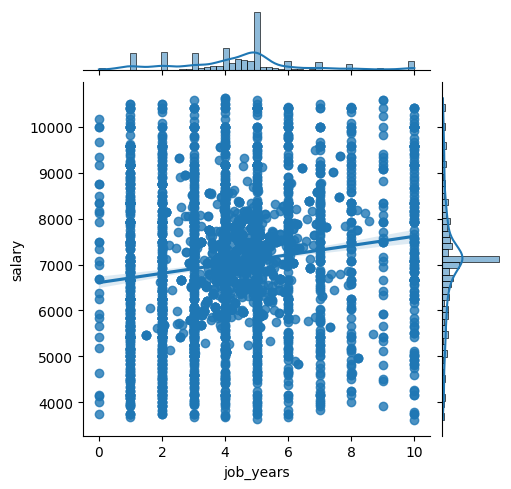

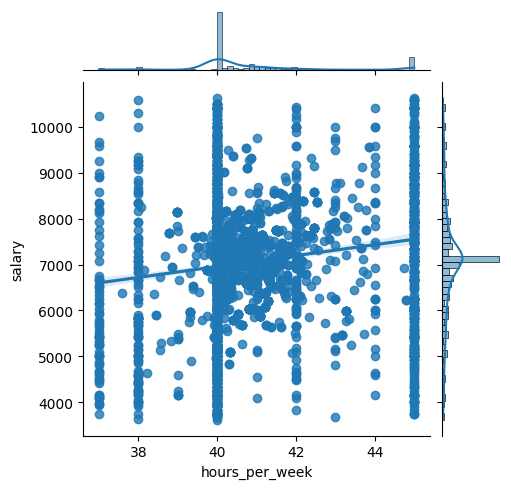

In [10]:
# joint plots for numeric variables

cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.jointplot(x=c, y="salary", data=data, kind = 'reg', height = 5)
plt.show()

From the plots above we can clearly see that job_years has a relation with salary. The more job_years means more monthly earning(salary). Similar trend is visible for hours_per_week variable in relation to the target variable (salary)

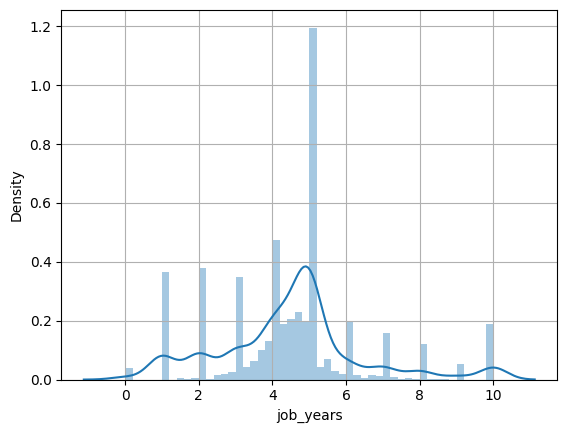

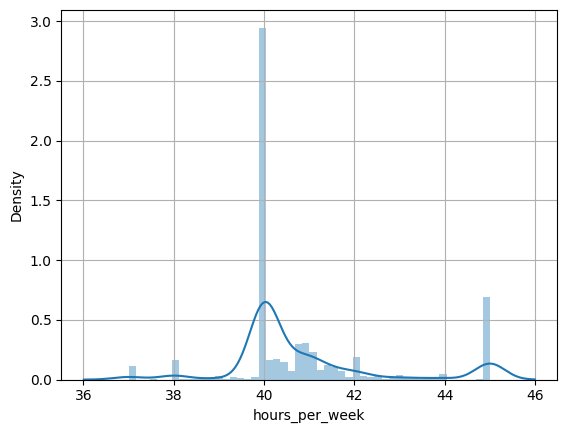

In [11]:
cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.distplot(data[c])
    plt.grid()
    plt.show()

The distributions plotted above are interesting. For job_years, we see a slightly skewed distribution which shows that majority of professionals in our data have less than 10 years of total job experience. For hours_per_week we see a somewhat bimodal distribution ( 2 peaks) showing that most people work from 40 to 45 hours per week.

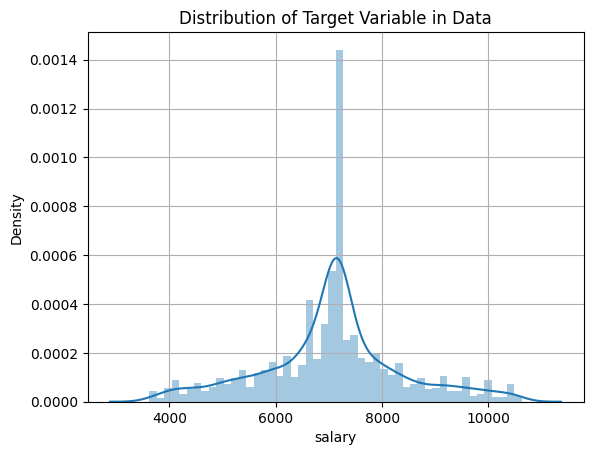

max: 10625.0
min: 3622.0


In [12]:
# distribution of target variable
sns.distplot(data['salary'])
plt.grid()
plt.title('Distribution of Target Variable in Data')
plt.show()
print('max:', np.max(data['salary']))
print('min:', np.min(data['salary']))

## Feature Encoding and Normalization

Before training the model, we should perform one-hot encoding for all categorical/discrete variables, normalize continuous variables and then combine all data to form the training set.

In [13]:
# create another copy of dataset and append encoded features to it
data_train = data.copy()
data_train.head()

,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [14]:
# select categorical features
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object'
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
cat_cols

['employment_status',
 'job_title',
 'education',
 'is_education_computer_related']

In [15]:
#Encoding binary variables
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

In [16]:
final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True,dtype=int)
final_data.shape

(4261, 25)

In [17]:
final_data.columns

Index(['job_years', 'is_manager', 'hours_per_week',
       'telecommute_days_per_week', 'certifications', 'salary',
       'employment_status_Independent or freelancer or company owner',
       'employment_status_Part time', 'job_title_Analytics consultant',
       'job_title_Architect', 'job_title_DBA', 'job_title_Data Scientist',
       'job_title_Developer', 'job_title_Engineer', 'job_title_Manager',
       'job_title_Other', 'job_title_Principal database engineer',
       'job_title_Sales', 'job_title_Sr Consultant ',
       'education_Bachelors (4 years)', 'education_Doctorate/PhD',
       'education_Masters', 'education_None (no degree completed)',
       'is_education_computer_related_Unknown',
       'is_education_computer_related_Yes'],
      dtype='object')

In [18]:
final_data

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,salary,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
0,4.783930,1,40.0,0.0,0,7187.743094,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,5.000000,0,40.0,5.0,0,10000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.000000,0,40.0,0.0,1,7000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1.000000,0,40.0,2.0,0,8333.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3.000000,0,40.0,2.0,1,7137.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2.000000,1,40.0,0.0,0,4917.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4273,4.140793,1,40.0,0.0,0,7033.845701,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4274,5.000000,0,40.0,0.0,0,7166.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4275,4.000000,1,40.0,2.0,0,9583.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


## Train Test Split

In [19]:
y = final_data['salary']
X = final_data.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (3408, 24)
Validation Set Dimensions: (853, 24)


## Pre-processing data

### Standardization (Z-score normalization):

$$ x_{\text{std}} = \frac{x - \mu}{\sigma} $$

- **Purpose:** Standardization transforms the data to have a mean of 0 and a standard deviation of 1.
- **Properties:**
  - Centers the data around 0.
  - Rescales the data to have unit variance.
  - Does not bound the data within a specific range.
  - Preserves the shape of the distribution.
- **Use Cases:**
  - Algorithms that assume zero-centered data or require features to have a similar scale (e.g., gradient descent-based algorithms, support vector machines).
  - When the distribution of the features is Gaussian-like.

### Normalization (Min-Max scaling):

 $$ x_{\text{norm}} = \frac{x - \min(x)}{\max(x) - \min(x)} $$

- **Purpose:** Normalization scales the data to a fixed range, typically [0, 1] or [-1, 1].
- **Properties:**
  - Scales the data to a specified range.
  - Shifts the data to start at 0.
  - Does not affect the shape of the distribution.
  - Preserves the relative relationships between data points.
- **Use Cases:**
  - Neural networks, especially those with activation functions sensitive to input magnitudes (e.g., sigmoid or tanh functions).
  - When the distribution of the features is unknown or non-Gaussian.

**Choosing Between Standardization and Normalization:**
- Use standardization when the distribution of your features is approximately Gaussian-like and you want to center the data and rescale it to have unit variance.
- Use normalization when the scale of your features is important, or when you need to bound the features within a specific range.
- It's often beneficial to try both preprocessing techniques and evaluate their effects on model performance to determine which one works best for your specific dataset and model.


In [20]:
# select numerical features
num_cols = ['job_years','hours_per_week','telecommute_days_per_week']
num_cols


['job_years', 'hours_per_week', 'telecommute_days_per_week']

In [21]:
# Apply standard scaling on numeric data
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [22]:
X_train

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
2998,0.144561,0,-0.027883,-0.620852,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1187,1.253030,0,2.354995,-0.620852,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2122,-1.233216,0,-0.488826,-0.620852,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2523,1.253030,0,-0.488826,1.197943,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2143,1.253030,0,-0.488826,2.410472,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,0.258532,1,-0.488826,-0.620852,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
71,-1.204540,0,0.218420,1.804207,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
107,-0.366949,0,-0.241856,-0.620852,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1607,0.067111,0,-0.028031,-0.014587,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [23]:
#Fitting a Linear Regression Model
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [24]:
reg.coef_

array([  182.17103668,    36.23014795,   214.7174243 ,   228.91149254,
          79.03511955,    -6.27911176,    59.5230241 , -2241.52727274,
        1132.11929494,   857.95662802,   700.0261946 ,   539.4614918 ,
        1003.51240528,   823.80344288,   112.74463042,   943.49434949,
         735.46152168,  3554.22452626,   339.26618152,  -332.8812672 ,
         211.30874399,   169.14577733,  -260.67074222,  -148.28693654])

In [25]:
reg.intercept_

6152.474051994228

Just to recall

$\hat{y} = \alpha + \beta_1 * X_1 + \beta_2 * X_2 +...$

Our Final model is given by -

$\hat{y} = 6145.79 + 1.887 * X_1 + 7.22 * X_2 +...$


In [26]:
# Normalized MSE (Dividing by mean)
mean_squared_error(y_train,reg.predict(X_train))/np.mean(y_train)

209.27690170287445

In [27]:
# Predict on the test data
y_pred = reg.predict(X_test)

In [28]:
#Evaluate the model on test data
mse = mean_squared_error(y_pred, y_test)/np.mean(y_test)
print("Mean Squared Error:", mse)


Mean Squared Error: 14249.020354701564


* A lower MSE indicates that the model's predictions are closer to the actual values on average, while a higher MSE suggests larger errors between predictions and actual values.

❗Pre-processing on Test data not done. (That will be your homework for this week.)

### Applications of Linear Regression:


*    Predicting house prices based on features like area, number of bedrooms, etc.
*     Forecasting sales based on advertising expenditure.
* Predicting student's performance based on study hours, previous grades, etc.

### Limitations of Linear Regression:

* Assumes a linear relationship between variables.
* Sensitive to outliers.
* Cannot capture complex relationships between variables.

In [29]:
#Week 6 HW:  Preprocess Test data and get predictions in the attached python notebook

#First, lets display the MSE before the test set is preprocessed:

#Evaluate the model on test data
mse = mean_squared_error(y_pred, y_test)/np.mean(y_test)
print("Mean Squared Error Before Normalization of Test Set:", mse)

# Now we apply standard scaling on numeric test data
scaler = StandardScaler()
scaler.fit(X_test[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#Display normalized test data
display(X_test)

#Since the model was already trained during the Week 6 session, we just need to use it to
# predict using the normalized test data

y_pred = reg.predict(X_test)

#Evaluate the model on the normalized test data
mse_normalized = mean_squared_error(y_pred, y_test)/np.mean(y_test)
print("Mean Squared Error After Normalization:", mse_normalized)
print("We can see that the data normalization done on the test set has decreased the MSE error from", mse, "to", mse_normalized, ".")





Mean Squared Error Before Normalization of Test Set: 14249.020354701564


,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
2581,0.153130,0,-0.047716,-0.041932,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
915,0.272533,1,-0.486232,2.383027,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
289,-1.821895,0,-0.486232,-0.648172,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2813,-0.774681,1,-0.486232,-0.648172,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
255,-1.298288,0,-0.486232,-0.648172,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,-0.774681,1,-0.486232,-0.041932,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2559,0.272533,0,-0.486232,-0.648172,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4050,0.214765,0,-0.284205,-0.648172,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1521,-0.406067,1,0.376836,-0.648172,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


Mean Squared Error After Normalization: 208.65338837085514
We can see that the data normalization done on the test set has decreased the MSE error from 14249.020354701564 to 208.65338837085514 .
